#### Folder Moving

In [ ]:
import os
notebook_path = os.getcwd()
os.chdir(notebook_path)

#### Data preprocessing

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data1.csv", sep=';')
print("Kích thước dữ liệu:", df.shape)
print(df.head())

df['Target'] = df['Target'].replace({'Graduate': 1, 'Dropout': 0, 'Enrolled': 0})

X = df.drop('Target', axis=1)
y = df['Target']

X = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Số lượng mẫu train: {X_train.shape[0]}, test: {X_test.shape[0]}")

Kích thước dữ liệu: (4424, 37)
   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       

### Assignment 1 (4 scores):

- Use Numpy only to construct the Logistic Regression model.
- Train that Logistic Regression model dataset using the Gradient Descend approach on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset. *Note that three class in this dataset must be merge into two class as: graduate and non-graduate (dropout or enroll)*.
- Evaluate that Logistic Regression model on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Visualize the loss function of the training process.

In [111]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_true, y_pred):
    m = len(y_true)
    return - (1/m) * np.sum(y_true*np.log(y_pred + 1e-9) + (1-y_true)*np.log(1 - y_pred + 1e-9))

def logistic_regression(X, y, lr=0.01, epochs=3000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    losses = []

    for i in range(epochs):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)

        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        w -= lr * dw
        b -= lr * db

        loss = compute_loss(y, y_pred)
        losses.append(loss)

        if i % 100 == 0:
            print(f"Epoch {i}, Loss: {loss:.4f}")
    return w, b, losses

w, b, losses = logistic_regression(X_train, y_train.to_numpy(), lr=0.1, epochs=1000)


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.3820
Epoch 200, Loss: 0.3596
Epoch 300, Loss: 0.3503
Epoch 400, Loss: 0.3451
Epoch 500, Loss: 0.3418
Epoch 600, Loss: 0.3394
Epoch 700, Loss: 0.3375
Epoch 800, Loss: 0.3361
Epoch 900, Loss: 0.3349


In [112]:
y_pred = sigmoid(np.dot(X_test, w) + b)
y_pred_label = (y_pred >= 0.5).astype(int)

acc = np.mean(y_pred_label == y_test)
print("Độ chính xác:", acc)


Độ chính xác: 0.8248587570621468


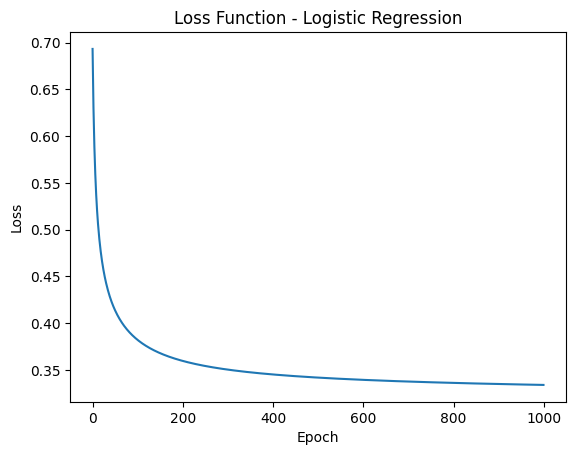

In [113]:
plt.plot(losses)
plt.title("Loss Function - Logistic Regression")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Assignment 2 (4 scores):

- Use Numpy only to construct the Sofmax Regression model.
- Train that Logistic Regression model dataset using the Gradient Descend approach on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Evaluate that Logistic Regression model on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Visualize the loss function of the training process.

In [ ]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


def one_hot(y, num_classes):
    return np.eye(num_classes)[y]


def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m

In [114]:
def softmax_regression(X, y, lr=0.1, epochs=1000, num_classes=3):
    m, n = X.shape
    W = np.zeros((n, num_classes))
    b = np.zeros((1, num_classes))
    losses = []

    y_onehot = one_hot(y, num_classes)

    for i in range(epochs):
        z = np.dot(X, W) + b
        y_pred = softmax(z)

        loss = compute_loss(y_onehot, y_pred)
        losses.append(loss)

        dW = (1/m) * np.dot(X.T, (y_pred - y_onehot))
        db = (1/m) * np.sum(y_pred - y_onehot, axis=0, keepdims=True)

        W -= lr * dW
        b -= lr * db

        if i % 100 == 0:
            print(f"Epoch {i:4d} | Loss: {loss:.5f}")
    return W, b, losses

In [115]:
num_classes = len(np.unique(y_train))
W, b, losses = softmax_regression(
    X_train, 
    y_train.to_numpy(), 
    lr=0.1, 
    epochs=3000, 
    num_classes=num_classes
)

z_test = np.dot(X_test, W) + b
y_pred = np.argmax(softmax(z_test), axis=1)

accuracy = np.mean(y_pred == y_test)
print(f"\nĐộ chính xác: {accuracy:.4f}")

Epoch    0 | Loss: 1.38629
Epoch  100 | Loss: 0.71895
Epoch  200 | Loss: 0.69018
Epoch  300 | Loss: 0.67870
Epoch  400 | Loss: 0.67219
Epoch  500 | Loss: 0.66788
Epoch  600 | Loss: 0.66481
Epoch  700 | Loss: 0.66252
Epoch  800 | Loss: 0.66077
Epoch  900 | Loss: 0.65940
Epoch 1000 | Loss: 0.65832
Epoch 1100 | Loss: 0.65745
Epoch 1200 | Loss: 0.65675
Epoch 1300 | Loss: 0.65618
Epoch 1400 | Loss: 0.65572
Epoch 1500 | Loss: 0.65533
Epoch 1600 | Loss: 0.65502
Epoch 1700 | Loss: 0.65475
Epoch 1800 | Loss: 0.65453
Epoch 1900 | Loss: 0.65434
Epoch 2000 | Loss: 0.65418
Epoch 2100 | Loss: 0.65405
Epoch 2200 | Loss: 0.65393
Epoch 2300 | Loss: 0.65383
Epoch 2400 | Loss: 0.65375
Epoch 2500 | Loss: 0.65368
Epoch 2600 | Loss: 0.65361
Epoch 2700 | Loss: 0.65356
Epoch 2800 | Loss: 0.65351
Epoch 2900 | Loss: 0.65347

Độ chính xác: 0.8282


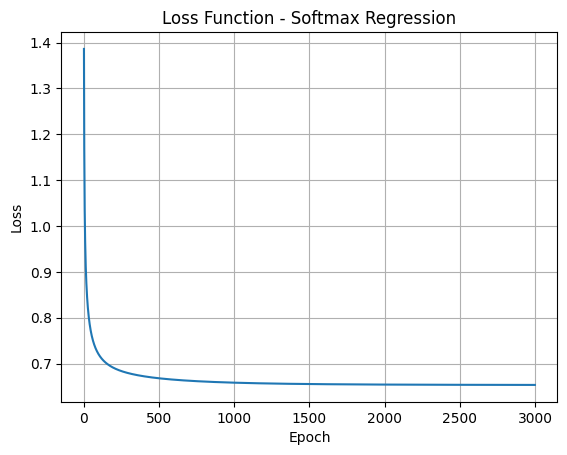

In [116]:
plt.plot(losses)
plt.title("Loss Function - Softmax Regression")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

### Assignment 3 (2 scores):

- Use a Machine Learning library (Scikit Learn or Skorch) to implement and evaluate the Logistic Regression on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Use a Machine Learning library (Scikit Learn or Skorch) to implement and evaluate the Softmax Regression on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.

#### Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

model = LogisticRegression(solver='lbfgs', max_iter=1, warm_start=True)
losses = [log_loss(y_train, model.fit(X_train, y_train).predict_proba(X_train)) for _ in range(300)]

print(f"Độ chính xác: {accuracy_score(y_test, model.predict(X_test)):.4f}")


Độ chính xác: 0.8282


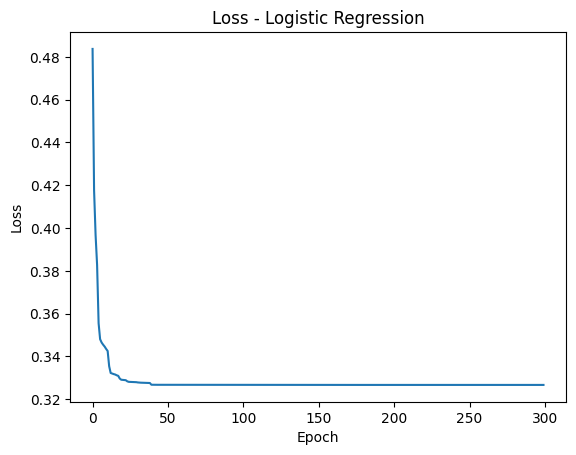

In [118]:
plt.plot(losses)
plt.title("Loss - Logistic Regression")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

#### Softmax Regression

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1, warm_start=True)

epochs = 100
losses = [log_loss(y_train, model.fit(X_train, y_train).predict_proba(X_train)) for _ in range(epochs)]
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Độ chính xác: {acc:.4f}")

Độ chính xác: 0.8294


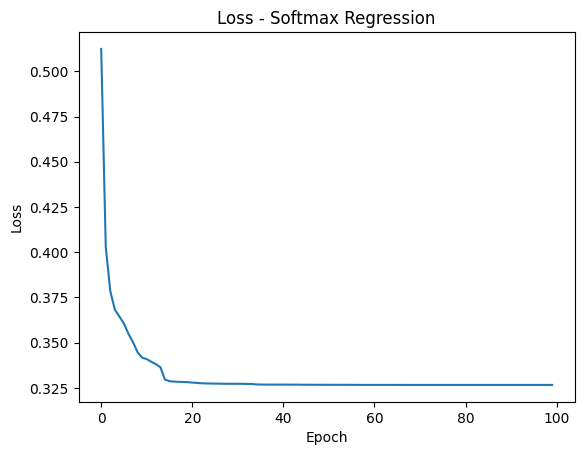

In [123]:
plt.plot(losses)
plt.title("Loss - Softmax Regression")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()